Comparison Of ALGORTIHMS to check accurate performance & selection 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [4]:
df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\shaun\AppData\Local\Temp\ipykernel_25036\4082084960.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\ML Projects\ML datasets\insurancecharges.csv")


In [5]:
print(df.head())
print(df.columns)
print(df.info())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [6]:
X = df.drop('charges', axis=1)
y = df['charges']


In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

In [9]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Transform features using the preprocessor
X_transformed = preprocessor.fit_transform(X)

# Bin the charges into 3 categories: low, medium, high
y_binned = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

print(" Model Comparison Results (Accuracy from 5-Fold CV):\n")
for name, model in models.items():
    scores = cross_val_score(model, X_transformed, y_binned, cv=5, scoring='accuracy')
    print(f"{name:<25}: Mean = {np.mean(scores):.4f} | Std = {np.std(scores):.4f}")


 Model Comparison Results (Accuracy from 5-Fold CV):

Logistic Regression      : Mean = 0.8423 | Std = 0.0216
Decision Tree            : Mean = 0.8319 | Std = 0.0226
Random Forest            : Mean = 0.8991 | Std = 0.0135
Support Vector Machine   : Mean = 0.8864 | Std = 0.0093
Naive Bayes              : Mean = 0.8363 | Std = 0.0196
K-Nearest Neighbors      : Mean = 0.8266 | Std = 0.0180


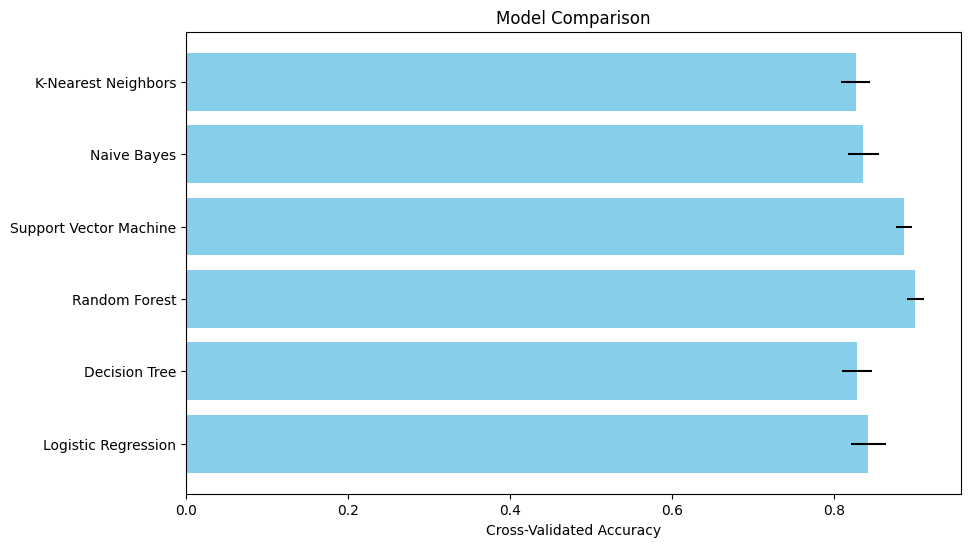

In [10]:
import matplotlib.pyplot as plt

mean_scores = []
std_scores = []

for model in models.values():
    scores = cross_val_score(model, X_transformed, y_binned, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

model_names = list(models.keys())

plt.figure(figsize=(10,6))
plt.barh(model_names, mean_scores, xerr=std_scores, color='skyblue')
plt.xlabel("Cross-Validated Accuracy")
plt.title("Model Comparison")
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_binned, test_size=0.2, random_state=42, stratify=y_binned)

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(5, 30, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Random search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, n_jobs=-1, scoring='accuracy', random_state=42, verbose=2)

random_search.fit(X_train, y_train)

best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 148}
